# Supervised Machine Learning - Classification - Titanic


# Get data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

| **Column Name**  | **Description**                                                 |
|------------------|-----------------------------------------------------------------|
| `PassengerId`    | Unique ID for each passenger.                                  |
| `Survived`       | Survival status (0 = No, 1 = Yes).                             |
| `Pclass`         | Ticket class (1 = 1st class, 2 = 2nd class, 3 = 3rd class).    |
| `Name`           | Passenger's name.                                              |
| `Sex`            | Passenger's gender (male = man, female = woman).               |
| `Age`            | Passenger's age in years.                                      |
| `SibSp`          | Number of siblings/spouses aboard the Titanic.                 |
| `Parch`          | Number of parents/children aboard the Titanic.                 |
| `Ticket`         | Ticket number.                                                 |
| `Fare`           | Fare paid for the ticket.                                      |
| `Cabin`          | Cabin number.                                                  |
| `Embarked`       | Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton). |


In [ ]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
212,213,0,3,"Perkin, Mr. John Henry",male,22.0,0,0,A/5 21174,7.2500,NaN,S
738,739,0,3,"Ivanoff, Mr. Kanio",male,NaN,0,0,349201,7.8958,NaN,S
190,191,1,2,"Pinsky, Mrs. (Rosa)",female,32.0,0,0,234604,13.0000,NaN,S
751,752,1,3,"Moor, Master. Meier",male,6.0,0,1,392096,12.4750,E121,S
475,476,0,1,"Clifford, Mr. George Quincy",male,NaN,0,0,110465,52.0000,A14,S


# Exploratory Data Analisis


The goal of performing Exploratory Data Analysis (EDA) in a machine learning model is to better understand the data before applying any model. It is a critical step that allows you to identify patterns, detect errors, and formulate hypotheses about the relationships between variables, all of which help to properly prepare the data for modeling.

In [ ]:
print("\nNumber of rows, columns:")
print(df.shape)


Number of rows, columns:
(891, 12)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Missing values
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
print("\nDescriptive Statistics of Numerical Variables:")
df.describe()


Descriptive Statistics of Numerical Variables:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
print("\nDescriptive Statistics of Categorical Variables")
df.describe(include=['object', 'category'])


Descriptive Statistics of Categorical Variables


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


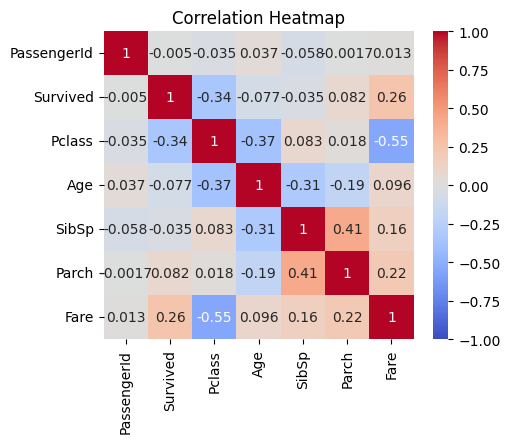

In [ ]:
# Selecting numerical features only
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Heatmap on numerical features
plt.figure(figsize=(5, 4))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

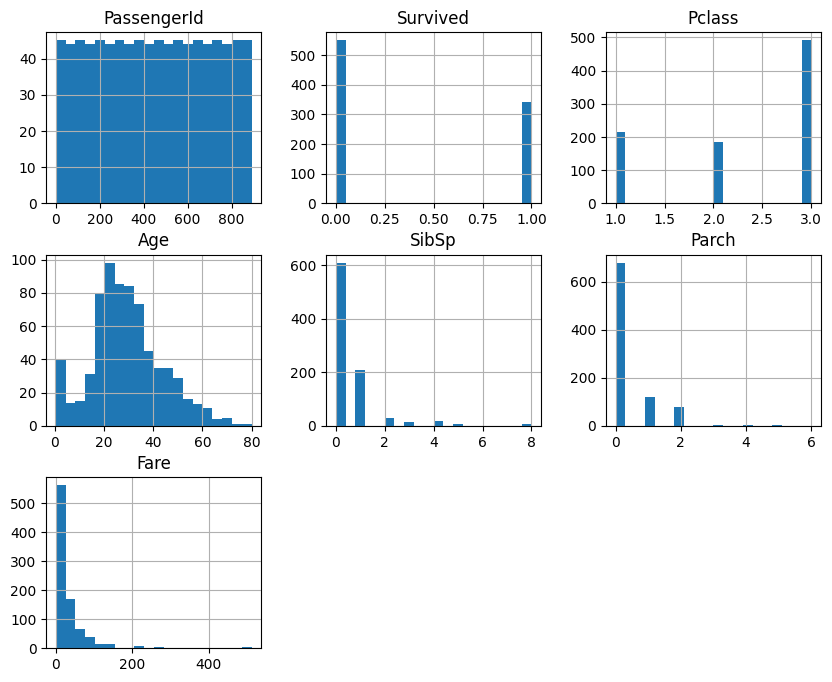

In [ ]:
# Histogram for numerical variables
df_numeric.hist(bins=20, figsize=(10, 8))
plt.show()

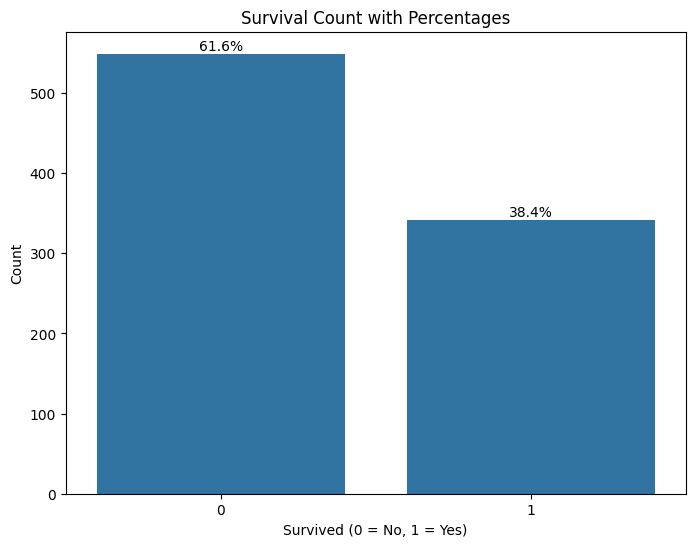

In [ ]:
# Plot Survival with percentages on top of each bar
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Survived', data=df)

# Calculate percentages and annotate the bars
total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'  # Calculate percentage
    x = p.get_x() + p.get_width() / 2  # X position for the label
    y = p.get_height()  # Y position for the label
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=10)

# Add title and labels
plt.title('Survival Count with Percentages')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

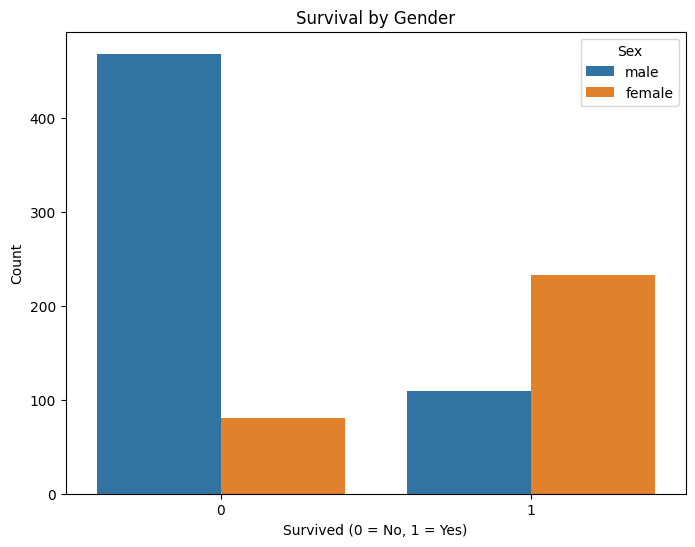

In [ ]:
# Gender vs Survival
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival by Gender')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

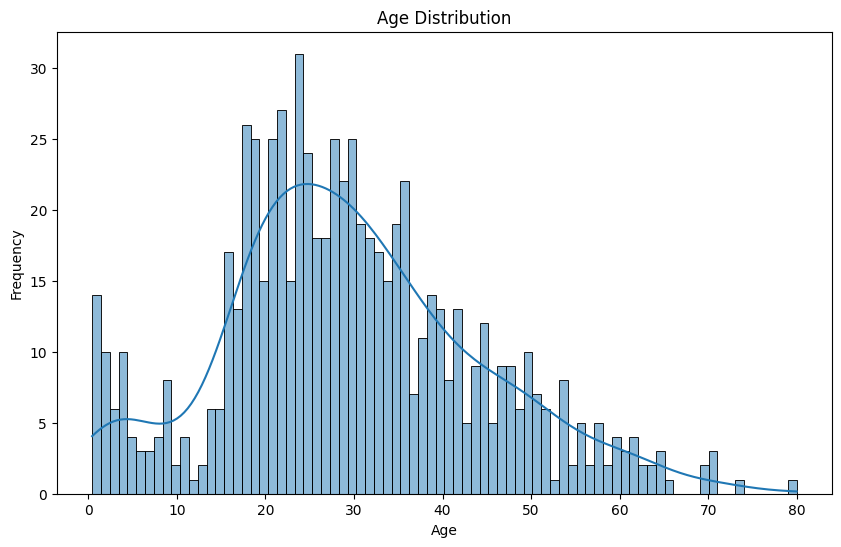

In [ ]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'].dropna(), bins=80, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

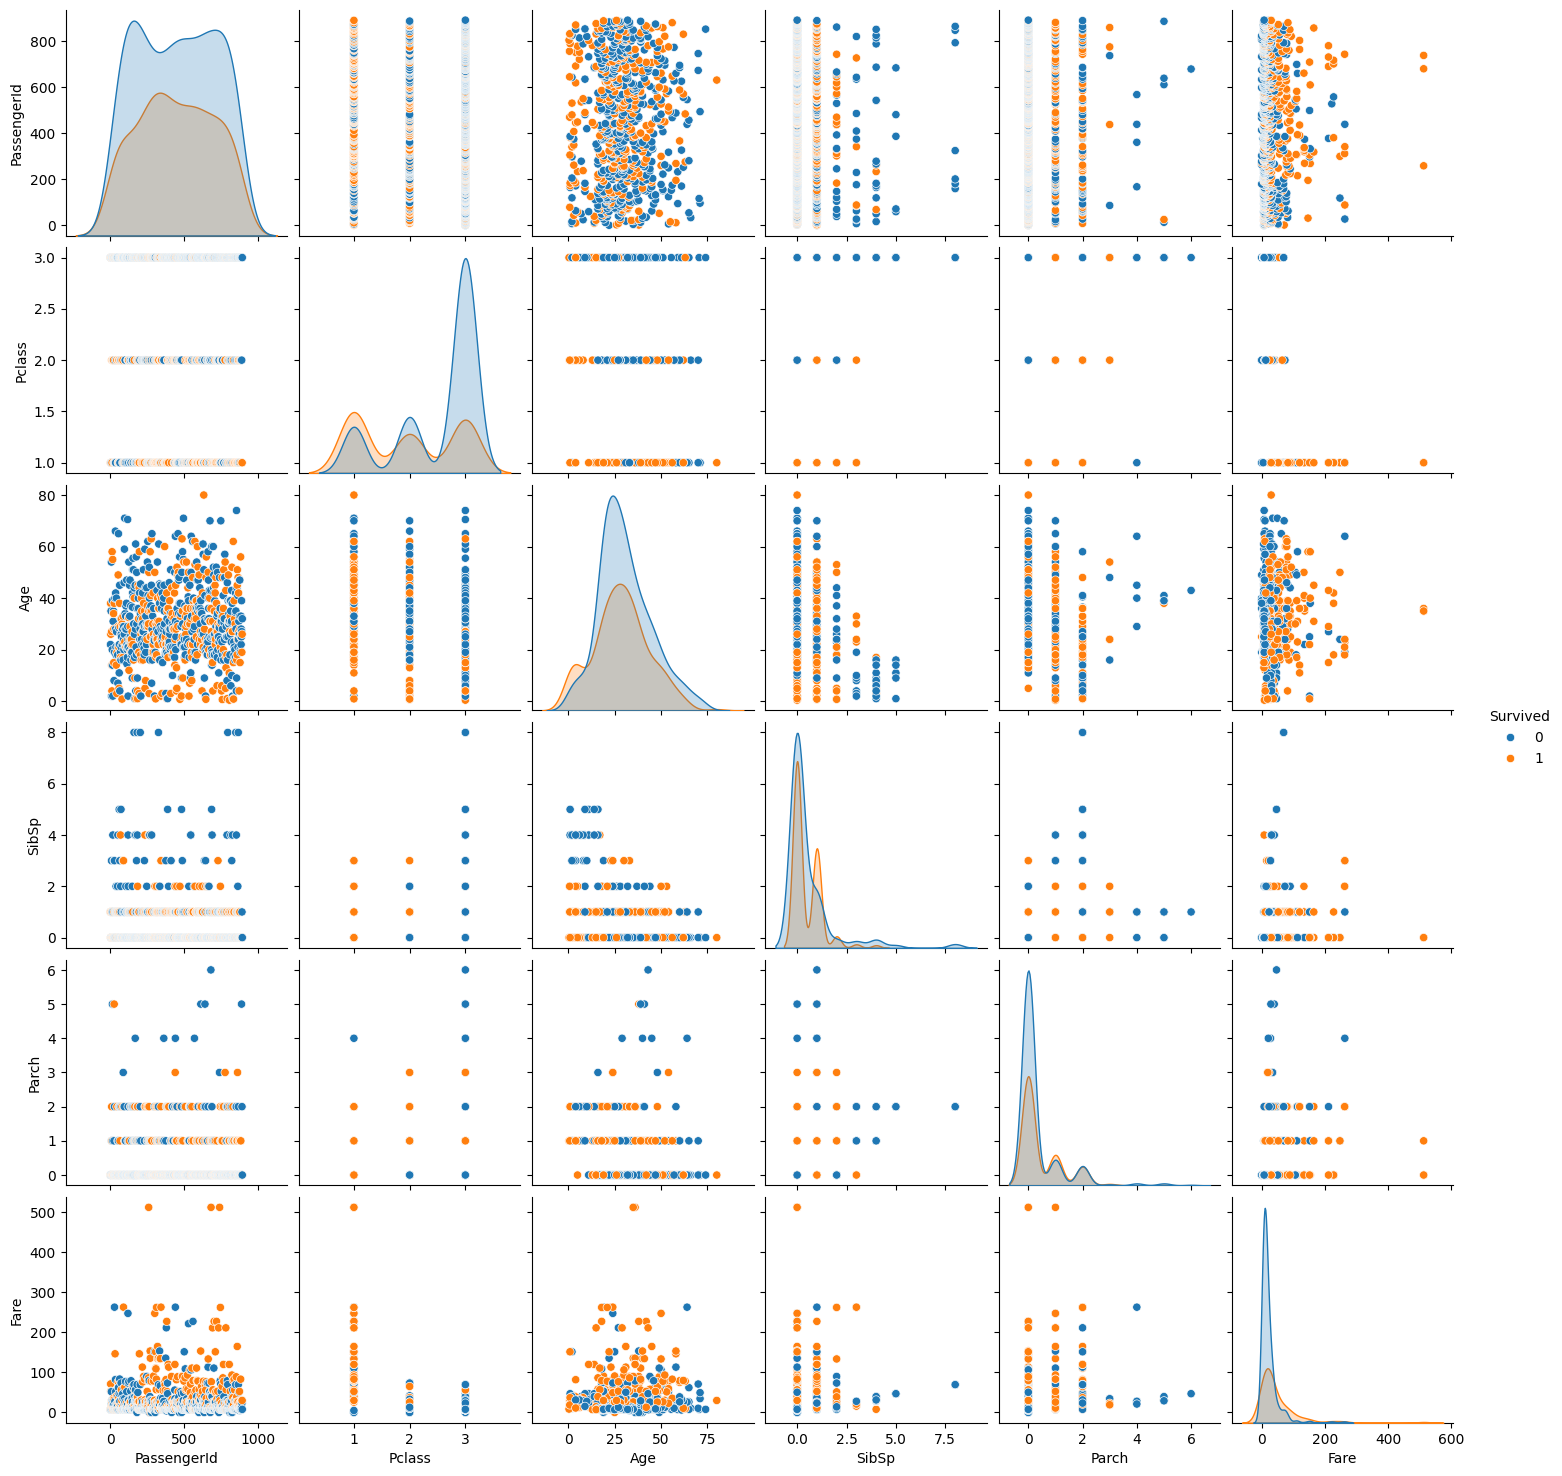

In [ ]:
# Create a pairplot for all numerical variables, coloring by the 'Survived' variable.
sns.pairplot(df, hue='Survived')
plt.show()

In [ ]:
useless_columns = ['PassengerId', 'Name', 'Ticket', 'Cabin']
df_new = df.drop(columns=useless_columns)  # Removing non-useful columns
df_new = df_new.dropna(subset=['Embarked'])  # Then, remove rows where 'Embarked' is null
df_new.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# ⚠️ Split Data into Training (Train) and Testing (Test) ⚠️

It is **crucial** to split the data into training and testing sets **BEFORE** performing any feature engineering or training the model.

If you transform the data before splitting, you may inadvertently allow information from the test set to leak into the training data. This leads to overfitting, where the model appears to perform very well but does not truly reflect its performance on new or unseen data.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [ ]:
# Define the features (X) and the target variable (y)
X = df_new.drop(columns=['Survived'])  # Here we are removing the target column
y = df_new['Survived']  # This is our target variable

In [ ]:
# Split the dataset into training (train) and testing (test) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Check the size of the sets
print(f"Training set size: {X_train.shape}. Training labels size: {y_train.shape}")
print(f"Test set size: {X_test.shape}. Test labels size: {y_test.shape}")

Training set size: (711, 7). Training labels size: (711,)
Test set size: (178, 7). Test labels size: (178,)


# Feature Engineering

- Feature engineering is the process of transforming raw data into features or variables that a Machine Learning model can effectively use to make predictions.

- These features are the values the model uses as inputs, so creating high-quality features can significantly improve the model's performance.

  - For **categorical features**, it is **mandatory** to transform them before using them in the model. This is because Machine Learning models cannot work directly with text or categories, so they need to be converted into a numerical format (e.g., one-hot encoding or ordinal encoding).

  - For **numerical features**, transformation is not mandatory, but it is recommended. Normalizing or standardizing numerical features can improve the model's accuracy and stability, especially when variables have very different magnitudes of values.

  - **Handling missing values**: Missing values can disrupt model performance. Depending on the data, you may need to impute missing values using methods like mean, median, mode, or interpolation. Alternatively, you can drop rows or columns with missing data if appropriate.

  - **Creating interaction features**: Sometimes, the interaction between two or more features can provide additional predictive power. For example, multiplying or combining features can reveal hidden relationships.

  - **Binning or discretizing features**: For continuous variables, you can create bins or categories (e.g., age groups) to simplify relationships and improve interpretability.

  - **Feature selection**: Removing irrelevant or redundant features can enhance model performance by reducing noise and overfitting.

  - **Dimensionality reduction**: Techniques like Principal Component Analysis (PCA) or Feature Agglomeration can help reduce the number of features while retaining essential information.

  - **Custom feature creation**: Sometimes, domain knowledge can guide you to create new features that better represent the problem at hand. Examples include:
    - Combining date-related features to create a "time of day" or "day of the week" variable.
    - Creating ratios or percentages (e.g., `Fare/FamilySize` to represent how much was paid per person).
    - Encoding geographic features such as latitude/longitude into clusters or distances from specific locations.
    - Generating text-based features, like word counts, sentiment scores, or keyword flags in textual data.
    - Building flags or binary indicators (e.g., "IsSeniorCitizen" for passengers over 60 years old).

  - **Applying domain-specific transformations**: Use domain expertise to create highly specific features that are unique to your dataset or industry (e.g., engineering features based on physical formulas in scientific data, or customer segmentation in marketing data).


In [ ]:
# Define which columns are categorical and which are numerical
categorical_columns = ['Sex', 'Embarked']
numerical_columns = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [ ]:
# Create a preprocessor that applies both imputation and scaling to numerical columns and one-hot encoding to categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),  # Imputation using the mean
            ('scaler', StandardScaler())  # Standardization of numerical columns
        ]), numerical_columns),  # Pipeline for numerical columns

        ('cat', OneHotEncoder(), categorical_columns)  # One-hot encoding for categorical columns
    ])

- We use `fit_transform` ONLY on `X_train` to **learn** the parameters of the transformation.

- We use **only** `transform` on `X_test` to **apply** those same transformations, without recalculating the parameters. This ensures no data leakage and allows the model to **generalize** correctly.


In [ ]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [ ]:
# The names of the numerical columns remain unchanged after the transformation
numerical_column_names = numerical_columns

# The method get_feature_names_out generates the names of the new columns created by OneHotEncoder for the categorical columns
categorical_column_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns)

# Combine the names of numerical and categorical columns into a single list
all_column_names = list(numerical_column_names) + list(categorical_column_names)

# Convert the matrix into a DataFrame with the column names
X_train_processed_df = pd.DataFrame(X_train_processed, columns=all_column_names)

X_train_processed_df.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,-1.584104,-6.029057e-01,-0.474516,-0.475644,2.430597,1.0,0.0,0.0,0.0,1.0
1,0.812275,2.709361e-16,0.381780,-0.475644,-0.358135,1.0,0.0,1.0,0.0,0.0
2,0.812275,1.597115e-01,-0.474516,-0.475644,-0.490949,0.0,1.0,0.0,0.0,1.0
3,0.812275,2.709361e-16,6.375852,2.010994,0.762595,1.0,0.0,0.0,0.0,1.0
4,0.812275,-1.212999e+00,3.806964,2.010994,0.301860,0.0,1.0,0.0,0.0,1.0


In [ ]:
# Convert the matrix into a DataFrame with the column names
X_test_processed_df = pd.DataFrame(X_test_processed, columns=all_column_names)

X_test_processed_df.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.812275,-0.145335,-0.474516,-0.475644,-0.492389,0.0,1.0,0.0,0.0,1.0
1,-1.584104,-1.212999,0.381780,2.010994,1.788823,1.0,0.0,0.0,0.0,1.0
2,0.812275,-1.212999,0.381780,-0.475644,-0.423482,1.0,0.0,1.0,0.0,0.0
3,-0.385915,0.007188,-0.474516,-0.475644,-0.387716,0.0,1.0,0.0,0.0,1.0
4,-1.584104,-0.907953,-0.474516,2.010994,0.968044,1.0,0.0,0.0,0.0,1.0


# Balancing your dataset

In classification tasks, checking if your data is balanced is crucial because an imbalanced dataset can cause the model to focus on predicting the majority class while ignoring the minority class, leading to biased and poor performance, especially for the underrepresented class. Balancing the data ensures that the model learns equally from all classes, improving its ability to generalize and accurately predict the minority class, which is often critical in applications like fraud detection, medical diagnoses, or churn prediction.

### How to balance your data?
1.  **Resampling Methods**
- Oversampling: Increase the number of samples in the minority class (e.g., using SMOTE, ADASYN, or simple duplication).
- Undersampling: Reduce the number of samples in the majority class to match the minority class.

2. **Class Weights**
Many algorithms (e.g., logistic regression, random forest, SVM) allow you to assign higher weights to the minority class, so the model pays more attention to it.


### Key considerations

- Always balance only the **training** set, not the test set.
- Compare model performance with and without balancing.
- Choose the balancing method carefully, as oversampling can lead to overfitting, and undersampling may lose important information.


In [ ]:
from imblearn.over_sampling import SMOTE # pip install imbalanced-learn
from collections import Counter

In [ ]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to balance the dataset
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_processed_df, y_train)

In [ ]:
# Print the class distribution after balancing
print("Class distribution after SMOTE:", Counter(y_train_balanced))

Class distribution after SMOTE: Counter({1: 440, 0: 440})


# Classification Models

In machine learning, it is common to train several models that are appropriate for the task at hand (in this case, classification) and then choose the best model based on its performance.

This time, we will train:
- Logistic Regression
- Support Vector Machine (SVM)
- K-Nearest Neighbors (KNN)
- Decision Trees
- Random Forest -- Ensemble model



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
# Create a list of models to train
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),  # You can adjust the number of neighbors
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
}

In [ ]:
# Create a dictionary to store metrics
results = {}

# Train each model with cross-validation
for model_name, model in models.items():
    print(f"Training and evaluating {model_name} with cross-validation...")

    # Perform cross-validation on the training set
    cv_scores = cross_val_score(
        model,
        X_train_balanced,
        y_train_balanced,
        scoring='accuracy',
        cv=5,  # 5-fold cross-validation
        n_jobs=-1  # Use all available processors for faster computation
    )

    # Train the model on the full training set
    model.fit(X_train_balanced, y_train_balanced)

    # Store the results in the dictionary
    results[model_name] = {
        'Cross-Validation Accuracy (mean)': cv_scores.mean(),
        'Cross-Validation Accuracy (std)': cv_scores.std(),
    }

Training and evaluating Logistic Regression with cross-validation...
Training and evaluating SVM with cross-validation...
Training and evaluating KNN with cross-validation...
Training and evaluating Decision Tree with cross-validation...
Training and evaluating Random Forest with cross-validation...


In [ ]:
# Display the results
results_df = pd.DataFrame(results).T.sort_values('Cross-Validation Accuracy (mean)', ascending=False)
results_df

,Cross-Validation Accuracy (mean),Cross-Validation Accuracy (std)
Random Forest,0.847727,0.037586
KNN,0.815909,0.019551
Decision Tree,0.807955,0.025511
SVM,0.806818,0.020643
Logistic Regression,0.776136,0.023177


# Model Evaluation

To evaluate the model's performance, we first need to use it to make **predictions** on the test dataset. Then, we will compare these predictions with the actual values from our test set to measure how well the model is performing. This will give us a clear idea of its ability to **generalize** to new data.


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import math

In [ ]:
# Create a dictionary to store metrics
results = {}

for model_name, model in models.items():
    # Predict on the test set
    y_pred = model.predict(X_test_processed_df)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)

    # Store the results in the dictionary
    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Confusion Matrix': confusion_mat
    }

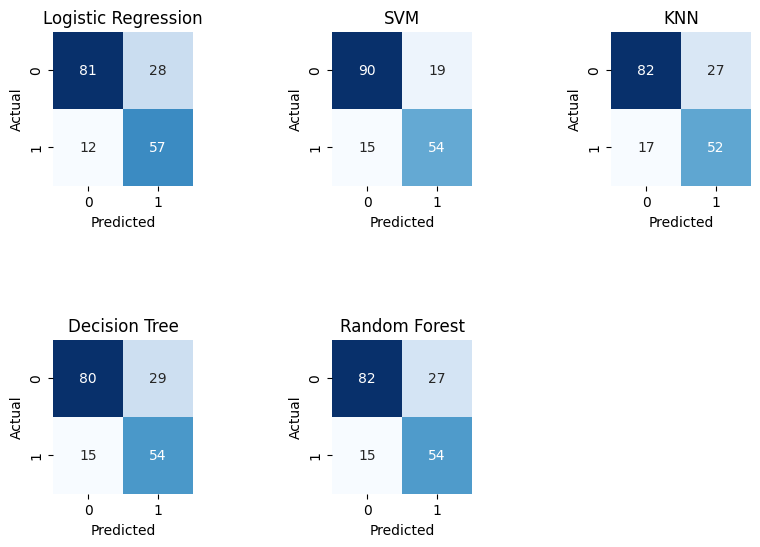

In [ ]:
# Calculate rows and columns for the plot grid
n_models = len(results)
n_cols = 3  # Maximum number of plots per row
n_rows = math.ceil(n_models / n_cols)  # Calculate the required number of rows

# Create the subplot grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 3, n_rows * 3))  # Smaller figure size

# Flatten axes for easy iteration (works for multi-row layouts)
axes = axes.flatten()

# Plot each confusion matrix
for idx, (model_name, metrics) in enumerate(results.items()):
    confusion_mat = metrics['Confusion Matrix']
    sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[idx])
    axes[idx].set_title(f"{model_name}")
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

# Hide any unused subplots
for idx in range(len(results), len(axes)):
    axes[idx].axis('off')

# Add vertical space between rows
plt.subplots_adjust(hspace=1)  # Increase vertical spacing
plt.subplots_adjust(wspace=1)  # Add optional horizontal spacing

plt.show()

In [ ]:
# Create a DataFrame for metrics and sort by F1-Score
metrics_df = pd.DataFrame(results).T.drop(columns='Confusion Matrix')

# Sort by F1-Score
metrics_df = metrics_df.sort_values(['F1-Score'], ascending=False)

metrics_df

,Accuracy,Precision,Recall,F1-Score
SVM,0.808989,0.739726,0.782609,0.760563
Logistic Regression,0.775281,0.670588,0.826087,0.74026
Random Forest,0.764045,0.666667,0.782609,0.72
Decision Tree,0.752809,0.650602,0.782609,0.710526
KNN,0.752809,0.658228,0.753623,0.702703


### Class Definitions:
- **True Positive (TP)**: Occurs when the model predicts that someone survives (prediction = 1), and that person actually survives (actual value = 1).
- **True Negative (TN)**: Occurs when the model predicts that someone does not survive (prediction = 0), and that person actually does not survive (actual value = 0).
- **False Positive (FP)**: Occurs when the model predicts that someone survives (prediction = 1), but that person actually does not survive (actual value = 0).
- **False Negative (FN)**: Occurs when the model predicts that someone does not survive (prediction = 0), but that person actually survives (actual value = 1).

---

### SVM: The Best Performing Model in this Case

In this context, the SVM model has the best overall metrics, and we will interpret each of them in a business scenario:

- **Accuracy**: The model correctly predicts the outcome (whether someone survives or not) in 80% of cases. From a business perspective, a model with high accuracy provides a good overall view, but it is important to also consider other metrics, especially if there is a class imbalance (e.g., more people did not survive compared to those who did).

- **Precision**: When the model predicts that someone will survive, it is correct 74% of the time. In a business context, this is critical if you want to minimize the cost of false positives, such as allocating resources (e.g., lifeboats) to people who do not actually need them.

- **Recall**: The model correctly identifies 78% of the people who actually survived. If the priority is to capture the maximum number of true positives, such as ensuring that everyone who needs help receives it, this metric is key. A low recall could mean leaving people out of the service's reach.

- **F1-Score**: The F1-Score balances precision and recall. A score of 0.76 indicates that the model strikes a good balance between avoiding false predictions of survivors and not missing true survivors. In a scenario where both aspects are important, such as efficiently allocating limited resources (e.g., lifeboats), this metric provides a comprehensive view of the model's performance.


# Hyperparameter Tuning and Cross-Validation

### Why Do Hyperparameter Tuning and Cross-Validation?

Hyperparameter tuning and cross-validation are essential steps in building a robust machine learning model. They help optimize the model's performance while preventing overfitting or underfitting. Here's why each is important:

- **Hyperparameter Tuning**: Machine learning models have parameters (hyperparameters) that control their behavior, such as the learning rate in gradient boosting or the number of neighbors in KNN. Tuning these parameters ensures the model performs optimally on unseen data by finding the best configuration.
  
- **Cross-Validation**: Cross-validation evaluates the model's performance on multiple subsets of the data to ensure it generalizes well. It helps avoid relying on a single train-test split, which could lead to overestimating or underestimating performance.

---

### When to Do Hyperparameter Tuning and Cross-Validation

- **Hyperparameter Tuning**:
  - After initial experimentation with the model to verify it works.
  - When you want to squeeze out the best performance from your model.
  - Particularly important for complex models (e.g., Random Forest, XGBoost, Neural Networks) that have many tunable parameters.
  
- **Cross-Validation**:
  - Always use cross-validation during hyperparameter tuning to ensure the evaluation is robust.
  - When you have limited data and want to maximize the use of your dataset.
  - To compare models fairly or when testing different hyperparameter combinations.

---

### How to Perform Hyperparameter Tuning and Cross-Validation

1. **Hyperparameter Tuning Methods**:
   - **Grid Search**: Try all possible combinations of a predefined set of hyperparameters.
   - **Random Search**: Randomly sample hyperparameters within a defined range. It is faster than grid search for large search spaces.
   - **Bayesian Optimization**: More sophisticated methods like `Optuna` or `HyperOpt` for efficient exploration of hyperparameters.

2. **Cross-Validation**:
   - Use **k-fold cross-validation** to split the data into `k` subsets (folds). Train on `k-1` folds and test on the remaining fold, repeating for all folds.
     ```
   - **Stratified Cross-Validation**: Ensures class distribution is maintained across folds (useful for imbalanced data).

3. **Combining the Two**:
   - Use cross-validation during hyperparameter tuning (e.g., with `GridSearchCV` or `RandomizedSearchCV`) to evaluate each parameter combination robustly and select the best one.

---

### Key Benefits
- Hyperparameter tuning ensures the model is optimized for the problem at hand.
- Cross-validation prevents overfitting to a single train-test split, ensuring the model generalizes well to unseen data.
- Together, they produce a model that balances performance and robustness, leading to reliable predictions in real-world scenarios.


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score

In [ ]:
# Hyperparameter grids for each model
param_grids = {
    'KNN': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan', 'minkowski']
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    }
}

In [ ]:
# Initialize the best models dictionary
best_models = {}

# Perform grid search for each model
for model_name, params in param_grids.items():
    print(f"Tuning {model_name}...")
    if model_name == 'KNN':
        model = KNeighborsClassifier()
    elif model_name == 'SVM':
        model = SVC(random_state=42)
    elif model_name == 'Random Forest':
        model = RandomForestClassifier(random_state=42)

    # Set up GridSearchCV
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=params,
        scoring='accuracy',
        cv=5,
        verbose=1
    )

    # Fit the grid search
    grid_search.fit(X_train_balanced, y_train_balanced)

    # Store the best model
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best accuracy score for {model_name}: {grid_search.best_score_}\n")

Tuning KNN...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Best accuracy score for KNN: 0.8215909090909091

Tuning SVM...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best accuracy score for SVM: 0.8136363636363637

Tuning Random Forest...
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best accuracy score for Random Forest: 0.8477272727272729



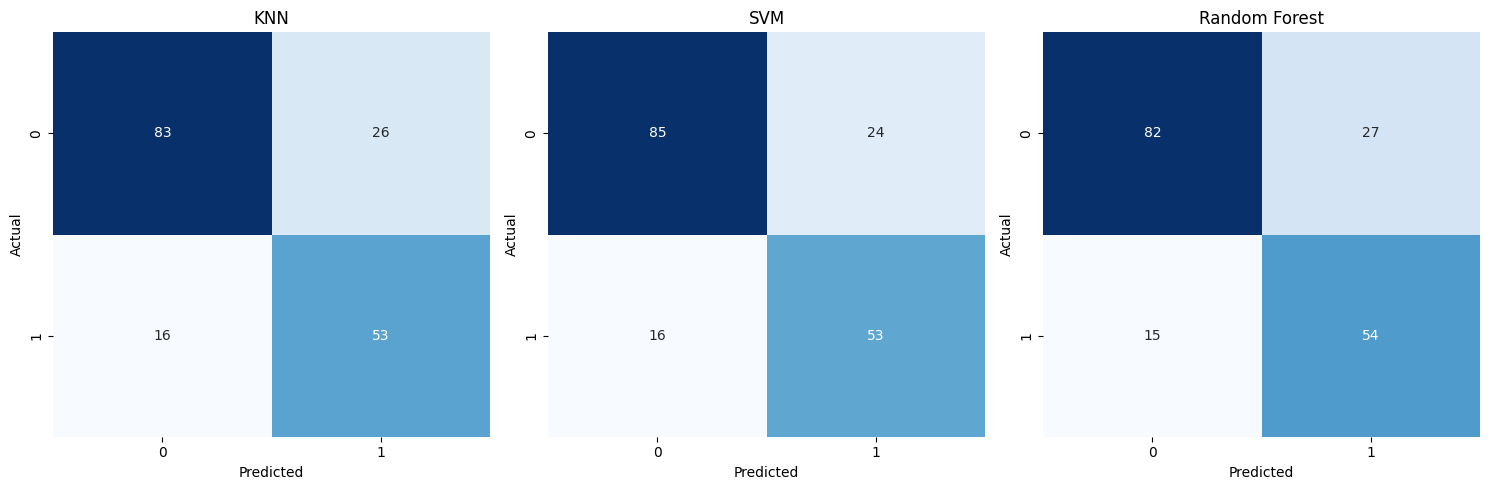

In [ ]:
# Evaluate the best models on the test set
results_tuned = {}

for model_name, model in best_models.items():
    # Predict on the test set
    y_pred = model.predict(X_test_processed_df)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)

    # Store the results
    results_tuned[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Confusion Matrix': confusion_mat
    }

# Display the tuned results
metrics_df_tuned = pd.DataFrame(results_tuned).T.drop(columns='Confusion Matrix')
metrics_df_tuned = metrics_df_tuned.sort_values(['Accuracy'], ascending=False)

#print("\nTuned Model Metrics:")
#print(metrics_df_tuned)

# Plot confusion matrices for the tuned models
fig, axes = plt.subplots(math.ceil(len(results_tuned) / 3), 3, figsize=(15, 5))
axes = axes.flatten()

for idx, (model_name, metrics) in enumerate(results_tuned.items()):
    confusion_mat = metrics['Confusion Matrix']
    sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[idx])
    axes[idx].set_title(f"{model_name}")
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

# Hide unused axes
for idx in range(len(results_tuned), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

# Interpretating the model

In [ ]:
! pip install shap

In [ ]:
import shap

In [ ]:
# Take a random sample of 50 background samples
background = shap.sample(X_train_balanced, 50)

# Create a SHAP explainer for the RF model
explainer = shap.KernelExplainer(models['Random Forest'].predict, background)

# Calculate the SHAP values for the test samples
shap_values = explainer.shap_values(X_test_processed)

  0%|          | 0/178 [00:00<?, ?it/s]

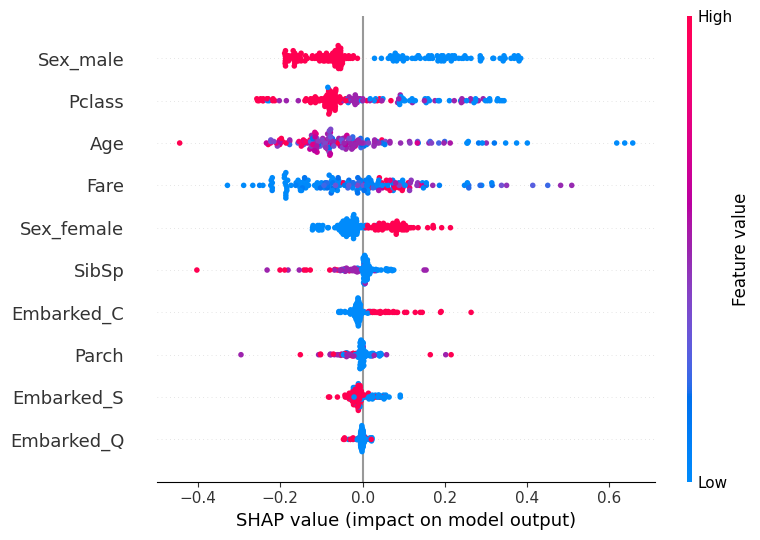

In [ ]:
# Visualize SHAP values
shap.summary_plot(shap_values, X_test_processed, feature_names=all_column_names)

The X-axis shows the SHAP value, which indicates how much an attribute impacts the model's prediction (either positively or negatively).
- Positive values on the X-axis mean that the feature increases the probability of survival.
- Negative values mean that the feature decreases the probability of survival.

The colors represent the feature's value.
- Red indicates a low value of the feature.
- Blue indicates a high value of the feature.

---

- The blue points for Sex_male (high values of the feature) are on the right, indicating that being female increases the probability of survival.
- The red points for Sex_male (low values of the feature, i.e., being male) are on the left, indicating that being male decreases the probability of survival.

- What other conclusions can you make?


# Recommendations and Conclusions

It is essential for data scientists to interpret their model and provide business recommendations because the ultimate goal of analysis is not only to develop accurate models, but to generate **real value** for the organization or company. Machine learning models and statistical analysis alone are not useful if stakeholders do not understand how they can be applied to decision-making. Data scientists must be able to translate technical results (such as coefficients, performance metrics, etc.) into actionable business recommendations.

---

---

- The Random Forest model has demonstrated the best overall metrics in this analysis, making it a reliable tool for predicting survival on the Titanic.

- The model performs solidly and makes correct predictions in most cases. This is useful for providing an overview of who might be in greatest need of help or resources in critical situations.

- While the model is strong, there is still a significant rate of false negatives, meaning the model is not correctly identifying all survivors. In critical situations, such as disasters or emergencies, a low recall can result in missing attention for those who need it the most. Improving this metric is crucial if the priority is to capture all positive cases (e.g., ensuring that all survivors are identified to receive care or resources).

- Important features like gender, social class, and age offer key insights to identify patterns that can help improve efficiency in strategic planning and resource allocation.


# Deployment (Optional)

The type of deployment for a machine learning model depends on the use case, the available infrastructure, and the business needs.


In [ ]:
import warnings
warnings.filterwarnings("ignore", message="X does not have valid feature names")

In [ ]:
def predict_survival(passenger, model, preprocessor):
    """
    Function to predict whether a passenger would survive on the Titanic.

    Parameters:
    - passenger: Dictionary with the passenger's features.
    - model: Trained model for making the prediction.
    - preprocessor: Preprocessor used to transform the data before training the model.

    Returns:
    - Prediction (0 = Did not survive, 1 = Survived).
    """
    # Create a DataFrame with the new passenger's data
    passenger_df = pd.DataFrame([passenger])

    # Apply preprocessing (transform the new passenger's data) to match the training data
    passenger_processed = preprocessor.transform(passenger_df)

    # Make the prediction using the trained model
    prediction = model.predict(passenger_processed)

    # Return the prediction (0 or 1)
    return prediction[0]

In [ ]:
new_passenger = {
    'Pclass': 3,
    'Sex': 'male',   # Can be 'male' or 'female'
    'Age': 25,
    'SibSp': 0,      # Number of siblings/spouses aboard
    'Parch': 0,      # Number of parents/children aboard
    'Fare': 7.25,    # Ticket fare
    'Embarked': 'S'  # Embarkation port ('S', 'C', 'Q')
}

In [ ]:
# Make a prediction for the new passenger
prediction = predict_survival(new_passenger, model=models['SVM'], preprocessor=preprocessor)
print(f"Would the passenger survive? {'Yes' if prediction == 1 else 'No'}")

Would the passenger survive? No


# More inspiration...

https://www.kaggle.com/c/titanic/code?competitionId=3136&sortBy=voteCount&excludeNonAccessedDatasources=true


In [ ]:
from google.colab import drive
drive.mount('/content/drive')